In [9]:
#### Load Data
## refer by  : https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/
#######################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


df = pd.read_csv('file_price_house/train_clean.csv')
#print(df.feature_names)

df.head()


,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [25]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("----------------------------------------")
print("### numeric columns -> ",len(numeric_cols))
print(numeric_cols) 



----------------------------------------
### numeric columns ->  38
['Unnamed: 0' 'MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual'
 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1'
 'BsmtFinSF2' 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF'
 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath'
 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces'
 'GarageYrBlt' 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF'
 'EnclosedPorch' '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold'
 'YrSold' 'SalePrice']


In [26]:
#Create train and test set
#########################
from sklearn.model_selection import train_test_split
train , test = train_test_split(df_numeric, test_size = 0.3)

x_train = train.drop('SalePrice', axis=1)
y_train = train['SalePrice']

x_test = test.drop('SalePrice', axis = 1)
y_test = test['SalePrice']


#x_train.head()
print(x_train.shape)
#y_train.head()
print(y_train.shape)
#x_test.head()
print(x_test.shape)
#y_test.head()
print(y_test.shape)



(1022, 37)
(1022,)
(438, 37)
(438,)


In [29]:
# Preprocessing – Scaling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [30]:
#Let us have a look at the error rate for different k values
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 50934.958942574354
RMSE value for k=  2 is: 44549.67721879797
RMSE value for k=  3 is: 40312.01436238105
RMSE value for k=  4 is: 38704.81994758276
RMSE value for k=  5 is: 38909.96589647373
RMSE value for k=  6 is: 37769.32815294455
RMSE value for k=  7 is: 36828.24609035747
RMSE value for k=  8 is: 36095.980364029805
RMSE value for k=  9 is: 35759.682883583664
RMSE value for k=  10 is: 35485.334143618995
RMSE value for k=  11 is: 36183.117541916865
RMSE value for k=  12 is: 36124.40327010925
RMSE value for k=  13 is: 35973.03396039949
RMSE value for k=  14 is: 35153.22117257051
RMSE value for k=  15 is: 35373.94678120356
RMSE value for k=  16 is: 34755.96525746398
RMSE value for k=  17 is: 34557.84783128324
RMSE value for k=  18 is: 34555.05953396224
RMSE value for k=  19 is: 34363.33393184767
RMSE value for k=  20 is: 34626.557881874396


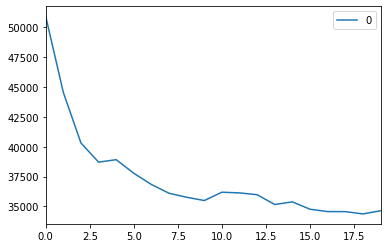

In [32]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()